# 1. Classic Machine Learning Models

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report

def train_model(model_name, model, X_train, X_test, y_train, y_test):
    print(f'BEGIN. {model_name.upper()}......')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print(f'TESTING DATA----> {model_name.upper()}: \t\t{accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'TRAINING DATA---> {model_name.upper()}: \t\t{accuracy_score(y_train, y_train_pred) * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print(f'END. {model_name.upper()}')
    print('======================================================')
    return y_pred

data = pd.read_csv('data/disaster_tweets.csv')

print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('\n============Message Preprocessing============')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2, stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print('Training and testing data shape after pre-processing:')
print(f'X_Train shape: {X_train_vect.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test_vect.shape}, y_test shape: {y_test.shape}')

print('\n=============Model Building==================')
lr_model = LogisticRegression()
lr_y_pred = train_model('Logistic Regression', lr_model, X_train_vect, X_test_vect, y_train, y_test)

svm_model = LinearSVC()
svm_y_pred = train_model('Support Vector Machine', svm_model, X_train_vect, X_test_vect, y_train, y_test)

nb_model = MultinomialNB()
nb_y_pred = train_model('Naive Bayes', nb_model, X_train_vect, X_test_vect, y_train, y_test)

=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)

============Message Preprocessing============
Training and testing data shape after pre-processing:
X_Train shape: (5329, 8557), y_train shape: (5329,)
X_Test shape: (2284, 8557), y_test shape: (2284,)

=============Model Building==================
BEGIN. LOGISTIC REGRESSION......
TESTING DATA----> LOGISTIC REGRESSION: 		80.12%
TRAINING DATA---> LOGISTIC REGRESSION: 		88.40%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1318
           1       0.81      0.69      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

END. LOGISTIC REGRESSION
BEGIN. SUPPORT VECTOR MACHINE......
TESTING DATA----> SUPPORT VECTOR MACHINE: 		77.76%
TRAINING DATA---> SUPPO

# 2. Recurrent Neural Networks

=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)
==============Convert Sentences to Sequences================
Found 17762 unique tokens.
Training Data shape: (5329, 33)
Testing Data shape: (2284, 33)
===============Create The Model==========================
Training model...........
Epoch 1/10
5329/5329 [==============================] - 69s 13ms/step - loss: 0.5649 - accuracy: 0.7108 - val_loss: 0.4944 - val_accuracy: 0.7601
Epoch 2/10
5329/5329 [==============================] - 64s 12ms/step - loss: 0.3631 - accuracy: 0.8414 - val_loss: 0.4426 - val_accuracy: 0.8087
Epoch 3/10
5329/5329 [==============================] - 70s 13ms/step - loss: 0.2357 - accuracy: 0.9082 - val_loss: 0.4933 - val_accuracy: 0.7802
Epoch 4/10
5329/5329 [==============================] - 71s 13ms/step - loss: 0.1462 - accuracy: 0.9452 - val_loss: 0.6242 - val_accuracy: 0.7964
Epoch 5/10
5329/5329 [

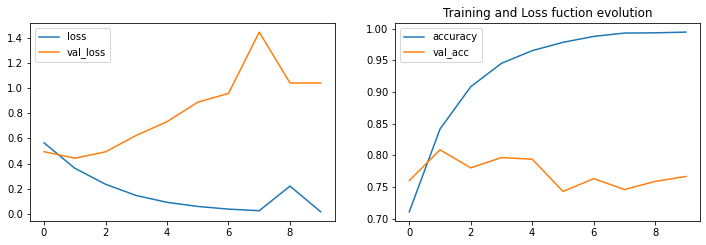

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D, Dropout
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def plot_loss_evaluation(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_acc')
    plt.legend()
    
    plt.title('Training and Loss fuction evolution')
    
def evaluate(model, X_train, X_test, y_train, y_test):
    y_pred_train = np.round(model.predict(X_train))
    y_pred_test = np.round(model.predict(X_test))
    
    print("=============Training Data===============")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))
    print(f"Accuracy score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
    
    print("=============Testing Data===============")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
    
data = pd.read_csv("data/disaster_tweets.csv")

print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('==============Convert Sentences to Sequences================')
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, char_level=False)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# pad sequence do that we get a NxT matrix
data_train = pad_sequences(sequences_train)
data_test = pad_sequences(sequences_test, maxlen=data_train.shape[1])
print(f"Found {len(tokenizer.word_index)} unique tokens.")
print(f"Training Data shape: {data_train.shape}")
print(f"Testing Data shape: {data_test.shape}")

print('===============Create The Model==========================')
# We get to choose embedding dimensionality
D = 20
# Hidden state dimentionality
M = 15
V = len(tokenizer.word_index)
T = data_train.shape[1]

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True, activation='relu')(x)
x = GlobalAveragePooling1D()(x)
# x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile and fit
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training model...........')
r = model.fit(data_train, y_train, epochs=10, 
              validation_data=(data_test, y_test), 
              batch_size=1)

print('================Model Evaluation=====================')
evaluate(model, data_train, data_test, y_train, y_test)
plot_loss_evaluation(r)

In [17]:
data.text.str.len()

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

# 3. Convolutional Neural Networks

=============Splitting the data=============
Data shape: (7613, 5)
X_Train shape: (5329,), y_train shape: (5329,)
X_Test shape: (2284,), y_test shape: (2284,)
==============Convert Sentences to Sequences================
Found 17762 unique tokens.
Training Data shape: (5329, 33)
Testing Data shape: (2284, 33)
===============Create The Model==========================
Training model...........
Epoch 1/5
5329/5329 [==============================] - 45s 8ms/step - loss: 0.5798 - accuracy: 0.6964 - val_loss: 0.5030 - val_accuracy: 0.7693
Epoch 2/5
5329/5329 [==============================] - 48s 9ms/step - loss: 0.3836 - accuracy: 0.8450 - val_loss: 0.5193 - val_accuracy: 0.7793
Epoch 3/5
5329/5329 [==============================] - 51s 9ms/step - loss: 0.2560 - accuracy: 0.9058 - val_loss: 0.4941 - val_accuracy: 0.8008
Epoch 4/5
5329/5329 [==============================] - 46s 9ms/step - loss: 0.1785 - accuracy: 0.9418 - val_loss: 0.6248 - val_accuracy: 0.7842
Epoch 5/5
5329/5329 [=========

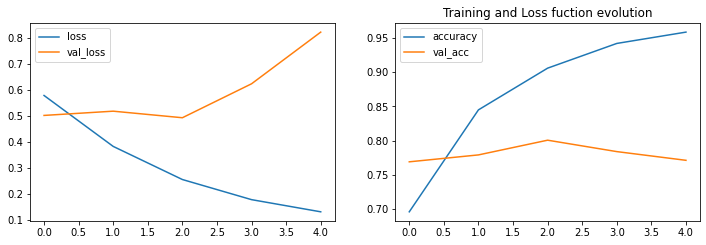

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import Conv1D, Embedding, Dropout
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


def plot_loss_evaluation(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_acc')
    plt.legend()
    
    plt.title('Training and Loss fuction evolution')
    
def evaluate(model, X_train, X_test, y_train, y_test):
    y_pred_train = np.round(model.predict(X_train))
    y_pred_test = np.round(model.predict(X_test))
    
    print("=============Training Data===============")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))
    print(f"Accuracy score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
    
    print("=============Testing Data===============")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print(f"Accuracy score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
    
data = pd.read_csv("data/disaster_tweets.csv")

print('=============Splitting the data=============')
X = data.text
y = data.target
print(f'Data shape: {data.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_Train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_Test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('==============Convert Sentences to Sequences================')
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# pad sequence do that we get a NxT matrix
data_train = pad_sequences(sequences_train)
data_test = pad_sequences(sequences_test, maxlen=data_train.shape[1])
print(f"Found {len(tokenizer.word_index)} unique tokens.")
print(f"Training Data shape: {data_train.shape}")
print(f"Testing Data shape: {data_test.shape}")

print('===============Create The Model==========================')
# We get to choose embedding dimensionality
D = 20

V = len(tokenizer.word_index)
T = data_train.shape[1]

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)

x = Conv1D(32, 2, activation='relu')(x)
x = MaxPooling1D()(x)
x = Dropout(0.1)(x)

x = Conv1D(64, 2, activation='relu')(x)
x = MaxPooling1D()(x)
x = Dropout(0.2)(x)

x = Conv1D(128, 2, activation='relu')(x)
x = MaxPooling1D()(x)
x = Dropout(0.3)(x)

x = Conv1D(264, 2, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dropout(0.5)(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile and fit
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training model...........')
r = model.fit(data_train, y_train, epochs=5, 
              validation_data=(data_test, y_test), 
              batch_size=1)

print('================Model Evaluation=====================')
evaluate(model, data_train, data_test, y_train, y_test)
plot_loss_evaluation(r)